### Video Link: https://drive.google.com/file/d/1QVG8a0dqWdgTikFD_j4xhxyy-wM9bMNk/view?usp=sharing

# COGS 108 - A Country's GDP Per Capita and Usage of Sustainable and Nonsustainable Energy Sources

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [ X ] YES - make available
* [   ] NO - keep private

# Overview

Our project examines how the wealth of a country affects the type of energy that they use, to determine whether more developed countries are more likely to use renewable energy sources. To do this, we consider the economic factors of a country like GDP per capita, and then compare that to the percent usage of each type of energy (both renewable and nonrenewable). In the end, we concluded that there is a positive correlation between a country's GDP per capita and their use of renewable energy.

# Names

- Sebastian Olivas
- Matthew Nguyen
- Rolando Restua
- Nicholas Boll
- Lucas Giumarra

<a id='research_question'></a>
# Research Question

Is there a correlation between the economic situation of a country (measured by GDP per capita) and the type of energy that they use (renewable e.g. solar/wind/hydro vs. nonrenewable e.g. coal/oil/gas)?

<a id='background'></a>

## Background & Prior Work

<b>Introduction:</b><br>
Countries around the world are taking notice of the drastic negative effects that are occurring in the environment. There is no doubt that as civilization has progressed technologically, we have taken steps back in terms of creating a more sustainable future for coming generations. Due to this imbalance, many countries have started implementing or already have implemented various renewable energies in an effort to protect the environment. However, renewable energy costs more than traditional and more polluting energy sources which can be problematic for countries that are not in the most ideal situation to invest in renewables. In this study, our team is attempting to see if there is a relationship between the economic status of a country and the use of renewable and nonrenewable energy sources. 

<b>Prior Work</b><br>
References (include links):
1) Causal nexus between energy consumption and economic growth for high, middle and low income countries using frequency domain analysis - Mumtaz Ahmed, 2016
- https://www.sciencedirect.com/science/article/abs/pii/S1364032115015579
- “We would like to emphasize that this is the first empirical effort investigating the causal nexus between energy consumption and economic growth using frequency domain approach covering a large set of countries from all income groups.”
- “The outcomes of this study will guide the policy makers of these countries regarding the energy and growth acceleration macroeconomic policies. Hope these policies will stimulate further economic growth within the boundaries of clean environment. In addition, the find- ings will add largely to the literature on hypotheses pertinent to energy use and growth causality.”
- “The empirical results have verified feedback hypothesis, growth hypothesis, energy conservation hypothesis and neutrality hypothesis, while using a large sample of 119 countries across the world. Moreover, the empirical results obtained are technically and statistically acceptable and plausible for further policy consideration.”
- This study’s overall question is different from our team’s in a very small way as it seeks to address the relationship between renewable energy growth and economic growth. Our study seeks to find relationships between the economic standing of a country and the types of renewables that country uses. However, this study compared its findings to various other hypotheses that have already been formulated. The drawback to this is that the findings were just enough to support the hypotheses which may not be conclusive enough in our situation. 

2) The role of energy efficiency and energy diversity in reducing carbon emissions: empirical evidence on the long-run trade-off or synergy in emerging economies - Barsha Nibedita and Mohd Irfan, 03 June 2021
- https://link.springer.com/article/10.1007/s11356-021-14642-7 
- “This study, therefore, investigates the long-run implications of energy efficiency and energy diversity on carbon emissions for emerging economies, covering the period 1990–2017. The long-run effect of energy efficiency on energy diversity and vice-versa is also examined to uncover any trade-off or synergy. The sample panel consists of the biggest seven emerging economies including, Brazil, China, India, Indonesia, Mexico, Russia, and Turkey.”
- “The results corroborate the argument that energy efficiency is an effective low-carbon strategy than energy diversity in the long run. Specifically, a 1% increase in energy efficiency and energy diversity reduces carbon emissions by 1.2% and 0.5%, respectively. Moreover, it is also revealed that the long-run impact of energy diversity on energy efficiency is negative, suggesting that a 1% increase in energy diversity reduces energy efficiency by 0.3%. This evidence uncovers a trade-off between these two strategies in the long-run. However, the long-run impact of energy efficiency on energy diversity is insignificant. These findings suggest that both low-carbon strategies must be promoted in tandem by considering the long-run trade-off between energy diversity and energy efficiency in emerging economies.”
- How this study contributes to this project: It finds that the long term impact of energy efficiency outcompetes the long term impact of energy diversity, thus, it might be in a country's best interest to first spend their money on energy efficiency technology rather than energy diversity technology. These findings can refute our hypothesis, since it finds that emerging economies might get more of a payoff by improving the efficiencies of their carbon based energies rather than building up their renewable energy sources.  
    

# Hypothesis


A country with a better economic situation (high GDP per capita) will be using a lot of energy, and will be inclined to use renewable energy as a result. Further, with more spending power, these countries would invest more in renewable energy.

# Dataset(s)

Dataset Name: Primary energy consumption by source
- Link to the dataset: https://ourworldindata.org/grapher/primary-energy-source-bar
- Number of observations: 5,003 rows containing data
- Description: This dataset contains energy consumption information by year (from 1965 to 2020) for 93 different countries around the world. This information is separated by the type of energy source.

Dataset Name: GDP per capita, 1950 to 2017
- Link to the dataset: https://ourworldindata.org/grapher/real-gdp-per-capita-pwt
- Number of observations: 9,985 rows containing data
- Description This dataset contains GDP per capita information by year (from 1950 to 2017) for 182 different countries around the world.

Dataset Name: Countries in the world by population
- Link to the dataset: https://www.worldometers.info/world-population/population-by-country/
- Number of observations: 267 rows containing data
- Description: Use this dataset to help us determine the impact that population may have on the results of this research. 


# Setup

In [59]:
## YOUR CODE HERE
# Imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import math
import seaborn as sns
sns.set()
sns.set_context('talk')

import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", 104)
import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

energy_df = pd.read_csv('data/primary-energy-source-bar.csv')
gdp_df = pd.read_csv('data/real-gdp-per-capita-PWT.csv')

pop_df = pd.read_csv('data/population-by-country.csv')

A preview of the energy data

In [60]:
energy_df.head()

,Entity,Code,Year,Coal Consumption - TWh,Oil Consumption - TWh,Gas Consumption - TWh,Nuclear Consumption - TWh,Hydro Consumption - TWh,Wind Consumption - TWh,Solar Consumption - TWh,Geo Biomass Other - TWh
0,Africa,NaN,1965,323.496138,327.333164,9.543754,0.0,38.626764,0.0,0.0,0.0
1,Africa,NaN,1966,323.122193,358.132674,10.669916,0.0,43.083345,0.0,0.0,0.0
2,Africa,NaN,1967,330.291585,355.281459,10.545670,0.0,44.973990,0.0,0.0,0.0
3,Africa,NaN,1968,343.512911,374.852131,10.688970,0.0,52.606502,0.0,0.0,0.0
4,Africa,NaN,1969,346.642922,379.973086,12.492000,0.0,61.391360,0.0,0.0,0.0


A preview of the GDP data

In [61]:
gdp_df.head()

,Entity,Code,Year,Output-side real GDP per capita (gdppc_o) (PWT 9.1 (2019))
0,Albania,ALB,1970,2828.0728
1,Albania,ALB,1971,2869.7212
2,Albania,ALB,1972,2919.5935
3,Albania,ALB,1973,2968.1025
4,Albania,ALB,1974,3024.6765


A preview of the population data

In [62]:
pop_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,57702.0,58044.0,58377.0,58734.0,59070.0,59442.0,59849.0,60236.0,60527.0,60653.0,60586.0,60366.0,60102.0,59972.0,60097.0,60561.0,61341.0,62213.0,62826.0,63024.0,62645.0,61838.0,61072.0,61033.0,62152.0,64623.0,68240.0,72495.0,76705.0,80324.0,83211.0,85450.0,87280.0,89009.0,90866.0,92892.0,94992.0,97016.0,98744.0,100028.0,100830.0,101226.0,101362.0,101452.0,101665.0,102050.0,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,152752671.0,156876454.0,161156430.0,165611760.0,170257189.0,175100167.0,180141148.0,185376550.0,190800796.0,196409937.0,202205766.0,208193045.0,214368393.0,220740384.0,227305945.0,234058404.0,240999134.0,248146290.0,255530063.0,263161451.0,271050065.0,279184536.0,287524258.0,296024639.0,304648010.0,313394693.0,322270073.0,331265579.0,340379934.0,349605660.0,358953595.0,368440591.0,378098393.0,387977990.0,398113044.0,408522129.0,419223717.0,430246635.0,441630149.0,453404076.0,465581372.0,478166911.0,491173160.0,504604672.0,518468229.0,532760424.0,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,10174840.0,10399936.0,10637064.0,10893772.0,11173654.0,11475450.0,11791222.0,12108963.0,12412960.0,12689164.0,12943093.0,13171294.0,13341199.0,13411060.0,13356500.0,13171679.0,12882518.0,12537732.0,12204306.0,11938204.0,11736177.0,11604538.0,11618008.0,11868873.0,12412311.0,13299016.0,14485543.0,15816601.0,17075728.0,18110662.0,18853444.0,19357126.0,19737770.0,20170847.0,20779957.0,21606992.0,22600774.0,23680871.0,24726689.0,25654274.0,26433058.0,27100542.0,27722281.0,28394806.0,29185511.0,30117411.0,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,109701811.0,112195950.0,114781116.0,117468741.0,120269044.0,123184308.0,126218502.0,129384954.0,132699537.0,136173544.0,139813171.0,143615715.0,147571063.0,151663853.0,155882270.0,160223588.0,164689764.0,169279422.0,173991851.0,178826553.0,183785612.0,188868567.0,194070079.0,199382783.0,204803865.0,210332267.0,215976366.0,221754806.0,227692136.0,233807627.0,240114179.0,246613750.0,253302310.0,260170348.0,267214544.0,274433894.0,281842480.0,289469530.0,297353098.0,305520588.0,313985474.0,322741656.0,331772330.0,341050537.0,350556886.0,360285439.0,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0
4,Angola,AGO,"Population, total",SP.POP.TOTL,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,5781305.0,5774440.0,5771973.0,5803677.0,5890360.0,6041239.0,6248965.0,6497283.0,6761623.0,7023994.0,7279630.0,7533814.0,7790774.0,8058112.0,8341290.0,8640478.0,8952971.0,9278104.0,9614756.0,9961993.0,10320116.0,10689247.0,11068051.0,11454784.0,11848385.0,12248901.0,12657361.0,13075044.0,13503753.0,13945205.0,14400722.0,14871572.0,15359600.0,15866871.0,16395477.0,16945753.0,17519418.0,18121477.0,18758138.0,19433604.0,20149905.0,20905360.0,21695636.0,22514275.0,23356247.0,24220660.0,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0


# Data Cleaning

First, we drop some columns that came with the data but are unnecessary for our purposes. We filtered the data to only include 1997-2017 since we wanted to only look in recent years, but with a large enough time period of at least 20 years. Also, the most recent year for our GDP dataframe is 2017, so we wanted to only use years both the energy and GDP dataframes had in common.

Since both datasets did not include all of the same countries, we looked for the ones that were present in both, and then dropped the rows that did not match. We then joined the two datasets together for convenience, and made the column names short and easy to read.


In [63]:
energy_df.Year.max()

2020

In [64]:
gdp_df.Year.max()

2017

In [65]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

# drop unnecessary columns
gdp_df = gdp_df.drop('Code', axis=1)
energy_df = energy_df.drop('Code', axis=1)

# filter by year (1997 - 2017)
gdp_df = gdp_df[(gdp_df['Year'] >= 1997) & (gdp_df['Year'] <= 2017)]
energy_df = energy_df[(energy_df['Year'] >= 1997) & (energy_df['Year'] <= 2017)]

# make equal indices (only keep common countries between both dataframes)
countries = energy_df['Entity'].unique()
gdp_df = gdp_df[gdp_df['Entity'].isin(countries)]
energy_df = energy_df[energy_df['Entity'].isin(gdp_df['Entity'].unique())]
gdp_df = gdp_df.rename(columns={'Entity': 'country', 'Year' :'year'})
energy_df = energy_df.rename(columns={'Entity': 'country', 'Year':'year'})

# set index to join tables together based on that index
energy_df.set_index(['country', 'year'], inplace=True)
gdp_df.set_index(['country', 'year'], inplace=True)
combined = gdp_df.join(energy_df)

# simplify column names
combined.columns = ['gdp_per_capita', 'coal', 'oil', 'gas', 'nuclear', 'hydro', 'wind', 'solar', 'other']
combined.reset_index(inplace=True)

The joined dataset:

In [66]:
combined.head()

,country,year,gdp_per_capita,coal,oil,gas,nuclear,hydro,wind,solar,other
0,Algeria,1997,7121.5879,5.95456,97.643419,194.040000,0.0,0.208333,0.0,0.0,0.0
1,Algeria,1998,7289.6309,6.37324,100.658748,200.681250,0.0,0.597222,0.0,0.0,0.0
2,Algeria,1999,7458.2280,6.82681,98.898346,205.108750,0.0,0.563889,0.0,0.0,0.0
3,Algeria,2000,8211.6533,5.64055,103.132480,191.012937,0.0,0.150000,0.0,0.0,0.0
4,Algeria,2001,8151.6367,6.51280,106.775334,197.322125,0.0,0.190422,0.0,0.0,0.0


We filter the population dataframe by our year range to determine our countries of interest:

In [67]:
# cleaning the population data
pop_df.drop(labels=['Indicator Name', 'Indicator Code', 'Country Code'], axis=1, inplace=True)
pop_df = pop_df.set_index('Country Name')

pop_df = pop_df[pop_df.index.isin(countries)].loc[:,['1997', '2017']].sort_values('2017', ascending=False)
pop_df.drop(labels=['North America', 'European Union', 'World'], inplace=True)

In [68]:
pop_df.head(10)

,1997,2017
Country Name,,
China,1.230075e+09,1.396215e+09
India,1.000900e+09,1.338677e+09
United States,2.726570e+08,3.251221e+08
Indonesia,2.028264e+08,2.646510e+08
Pakistan,1.310574e+08,2.079062e+08
Brazil,1.672090e+08,2.078338e+08
Bangladesh,1.201606e+08,1.596854e+08
Japan,1.260570e+08,1.267858e+08
Mexico,9.461101e+07,1.247773e+08


These are the top 10 highest population countries for 2017. We'll include these in our analysis, along with other countries that had significant GDP changes.

Now, we'll check if there is any missing data in our sets:

In [69]:
gdp_df[gdp_df.isna().any(axis=1)].shape[0]

0

In [70]:
energy_df[energy_df.isna().any(axis=1)].shape[0]

0

In [71]:
pop_df[pop_df.isna().any(axis=1)].shape[0]

0

Since the data did not have any empty fields, and all of our columns are completely filled out, this completes our data cleaning process.

# Data Analysis & Results

### This is the beginning of our Exploratory Data Analysis

We decided that we needed to changed our combined dataframe to only include the countries of interest that we wanted to analyze. These countries were specified in our pop_df dataframe that included 10 coutnries with the highest populations in the world. We did this mainly in order to reduce the number of countries to analyze but also to use coutnries that could potentially have more significant results. We also noted that larger countries would be less susceptible to any sudden large changes. 

In [72]:
#Filter combined df to represent our countries of interest
countries_of_interest = ['China', 'India', 'United States', 'Indonesia', 'Pakistan', 'Brazil', 'Bangladesh', 'Japan', 'Mexico', 'Philippines']
countries_of_interest_df = combined.set_index('country').loc[countries_of_interest].reset_index()

From this point we decided that it would be the most beneficial for us to compare the years 1997 and 2017 to view the economic and energy use changes over time. We decided to choose 2017 due to our GDP data only being available up until 2017. As for 1997 we found that in the years before this, economic and environmental data was being reported more incosistently than how it is now. In the cell below we created two different data frames that took the data from our countries of interest from 2017 and 1997.

In [73]:
#use 1997 and 2017 in order to compare change over time
df_1997 = countries_of_interest_df[countries_of_interest_df['year'] == 1997]
df_2017 = countries_of_interest_df[countries_of_interest_df['year'] == 2017]


#reset the index to clean the df
df_1997.reset_index()
df_2017.reset_index()



,index,country,year,gdp_per_capita,coal,oil,gas,nuclear,hydro,wind,solar,other
0,20,China,2017,13042.6460,22385.443400,7278.487461,2412.519420,620.250000,2912.662500,761.500000,294.500000,79.597484
1,41,India,2017,6421.6704,4844.708117,2571.887377,537.355448,93.536125,339.558277,131.562375,53.861450,24.908186
2,62,United States,2017,54794.7580,3852.592642,10076.847456,7399.922517,2118.288513,742.016116,642.178523,195.143939,82.800321
3,83,Indonesia,2017,10594.0670,664.805873,875.053932,432.153393,0.000000,46.580975,0.000000,0.072625,13.059050
4,104,Pakistan,2017,5303.3789,83.117261,339.493268,407.395837,20.292424,75.510168,4.407254,3.285802,1.075315
5,125,Brazil,2017,13812.9920,195.271416,1362.496330,376.320284,39.347991,927.266141,105.933146,2.079534,52.912105
6,146,Bangladesh,2017,3436.0527,21.726670,92.725518,265.926724,0.000000,2.573820,0.012703,0.633402,0.002877
7,167,Japan,2017,40373.7500,1415.963447,2172.610592,1169.864840,72.683563,198.228369,14.567925,135.604227,27.389729
8,188,Mexico,2017,17382.6580,176.752790,998.083919,860.335313,27.207154,79.619139,26.549454,2.963471,8.123817
9,209,Philippines,2017,7679.1758,179.997487,247.051814,37.744271,0.000000,24.026998,2.733895,3.002880,11.283225


### GDP per Capita Over Time

This graph was used to illustrate the change in our selected countries GDP per capita over time. As you can see we purposely chose countries that would not have very drastic changes in regards to GDP per capita. The bottom line with this graph is that we do notice an increase in GDP per capita and whether or not that correlates to an increase in the usage of renewable energies. 

[Text(0.5, 1.0, 'Change in GDP Per Capita Over Time')]

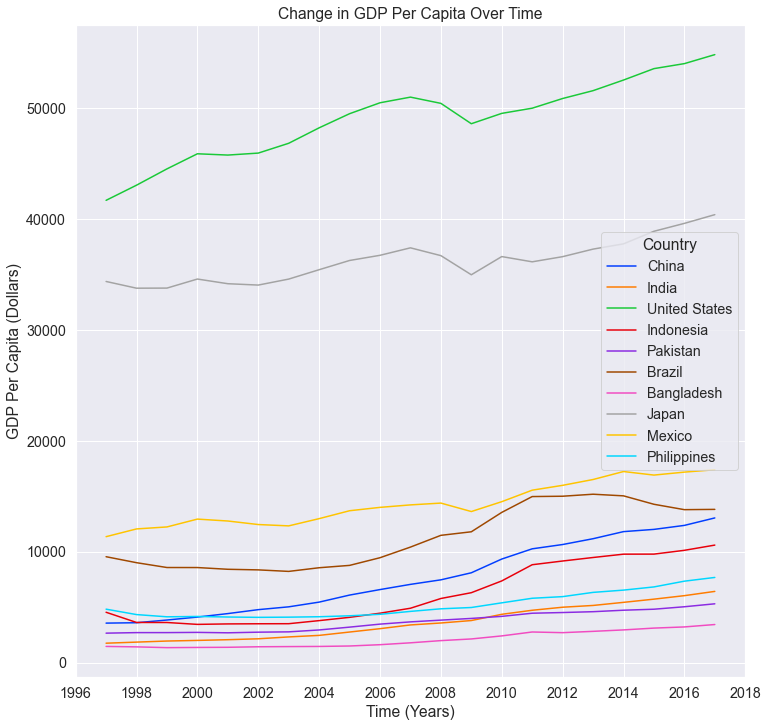

In [74]:
#Create standard figure size for each graph
sns.set(rc = {'figure.figsize':(12, 12)})
sns.set(font_scale = 1.3)
gdp_vs_time = sns.lineplot(x='year', y='gdp_per_capita', hue='country', data=countries_of_interest_df, palette='bright')
#re-label axis
gdp_vs_time.set_xlabel('Time (Years)')
gdp_vs_time.set_ylabel('GDP Per Capita (Dollars)')
plt.legend(title='Country')
gdp_vs_time.xaxis.set_major_locator(ticker.MultipleLocator(2))
gdp_vs_time.set(title='Change in GDP Per Capita Over Time')

### Coal Energy Usage Over Time

As we can see, China is clearly the leader amognst these countries in terms of coal consumption. Despite having positive GDP per capita growth, there reliance on a non-renewable energy source continues to rise. As for the other countries, there seems to be stagnant or declining usage rates amongst the rest of the countries except for India. 

[Text(0.5, 1.0, 'Change in Coal Energy Consumption Over Time')]

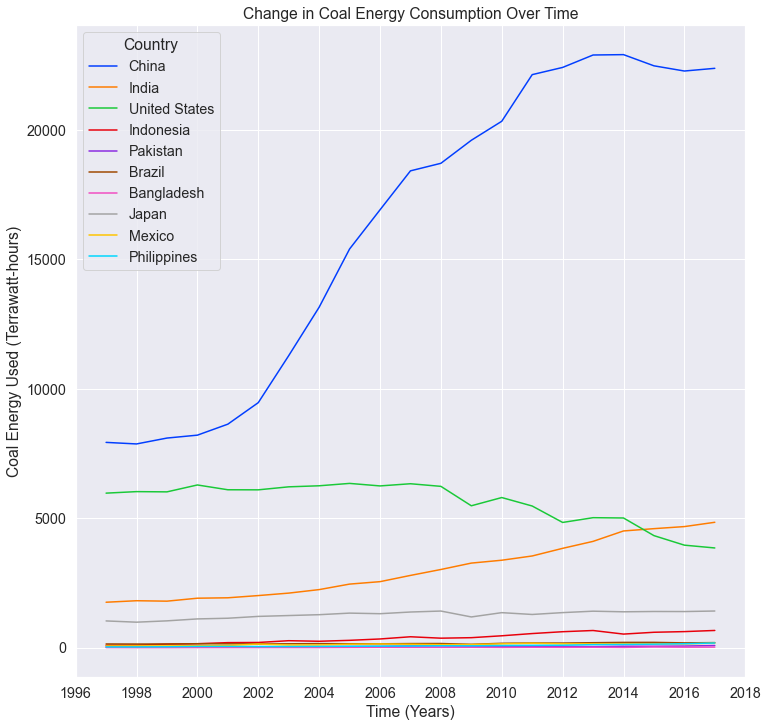

In [75]:
sns.set(rc = {'figure.figsize':(12, 12)})
sns.set(font_scale = 1.3)
coal_vs_time = sns.lineplot(x='year', y='coal', hue='country', data=countries_of_interest_df, palette = 'bright')

coal_vs_time.set_xlabel('Time (Years)')
coal_vs_time.set_ylabel('Coal Energy Used (Terrawatt-hours)')

plt.legend(title='Country')
coal_vs_time.xaxis.set_major_locator(ticker.MultipleLocator(2))
coal_vs_time.set(title='Change in Coal Energy Consumption Over Time')

### Oil Energy Usage Over Time

From this graph we can see that a few countries like China, the US, and India has seen steady growth in terms of oil usage in recent years. However, the other countries are trending downward as they are possibly try to let go of their reliance of non-renewables. 

[Text(0.5, 1.0, 'Change in Oil Energy Consumption Over Time')]

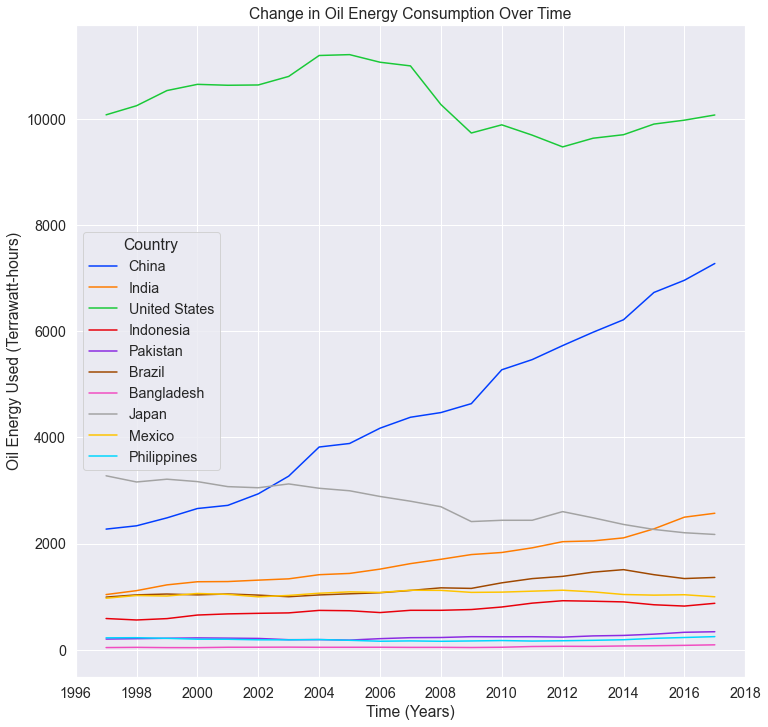

In [76]:
sns.set(rc = {'figure.figsize':(12, 12)})
sns.set(font_scale = 1.3)
oil_vs_time = sns.lineplot(x='year', y='oil', hue='country', data=countries_of_interest_df, palette = 'bright')

oil_vs_time.set_xlabel('Time (Years)')
oil_vs_time.set_ylabel('Oil Energy Used (Terrawatt-hours)')

plt.legend(title='Country')
oil_vs_time.xaxis.set_major_locator(ticker.MultipleLocator(2))
oil_vs_time.set(title='Change in Oil Energy Consumption Over Time')

### Gas Energy Usage Over Time

The US continues to top many of the graphs thus far as it continues to use more and more gas energy. The rest of the countries being analyzed can also be seen trending upward in terms of gas consumption.

[Text(0.5, 1.0, 'Change in Gas Energy Consumption Over Time')]

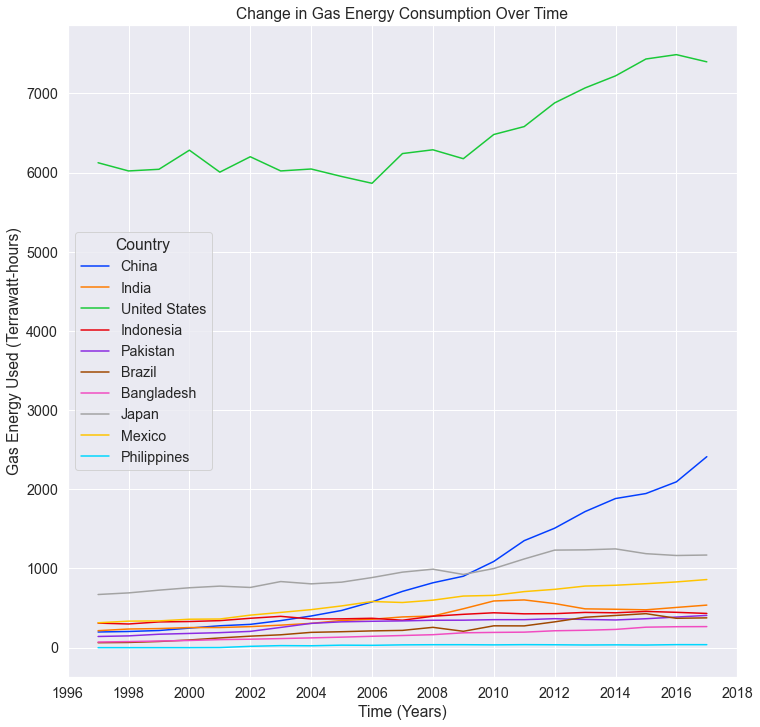

In [77]:
sns.set(rc = {'figure.figsize':(12, 12)})
sns.set(font_scale = 1.3)
gas_vs_time = sns.lineplot(x='year', y='gas', hue='country', data=countries_of_interest_df, palette = 'bright')

gas_vs_time.set_xlabel('Time (Years)')
gas_vs_time.set_ylabel('Gas Energy Used (Terrawatt-hours)')

plt.legend(title='Country')
gas_vs_time.xaxis.set_major_locator(ticker.MultipleLocator(2))
gas_vs_time.set(title='Change in Gas Energy Consumption Over Time')

### Nuclear Energy Usage Over Time

US is the outlier in this graph as it has used the most nuclear energy out of any of other countries over the 20 years that this graph is illustrating. Japan has had a sharp decline in nuclear energy usage possily due to the natural disasters that occured during the time of the sudden drop. China is also seen fast growth in recent years with nuclear energy possibly becoming more popular there. 

[Text(0.5, 1.0, 'Change in Nuclear Energy Consumption Over Time')]

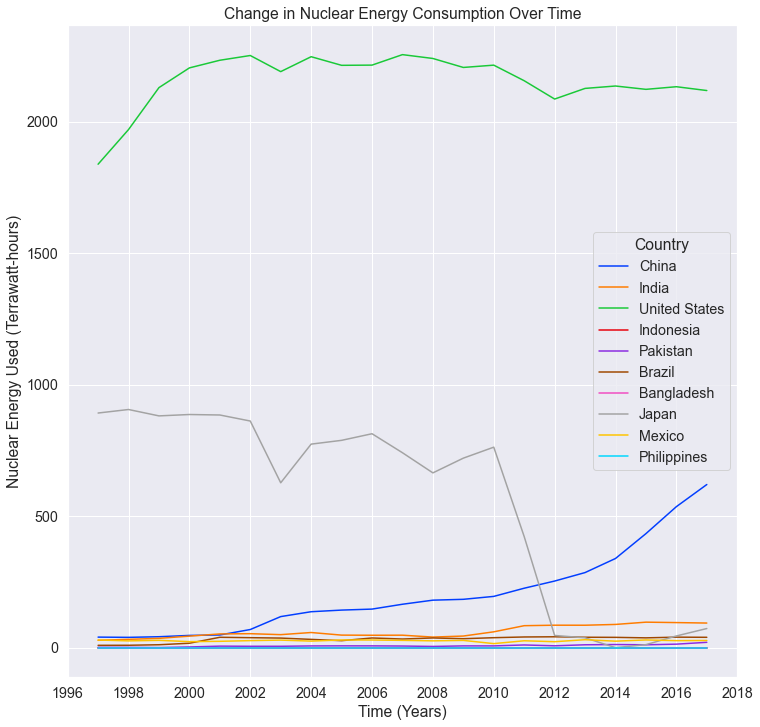

In [78]:
sns.set(rc = {'figure.figsize':(12, 12)})
sns.set(font_scale = 1.3)
nuclear_vs_time = sns.lineplot(x='year', y='nuclear', hue='country', data=countries_of_interest_df, palette = 'bright')

nuclear_vs_time.set_xlabel('Time (Years)')
nuclear_vs_time.set_ylabel('Nuclear Energy Used (Terrawatt-hours)')

plt.legend(title='Country')
nuclear_vs_time.xaxis.set_major_locator(ticker.MultipleLocator(2))
nuclear_vs_time.set(title='Change in Nuclear Energy Consumption Over Time')

### Hydroelectric Energy Usage over Time

China has seen the most increase in terms of hydroelectric energy usage out of any of the other countries. Other than this, none of the other countries being compared have really shown any significant increases in hydro energy usage over the past 20 years. 

[Text(0.5, 1.0, 'Change in Hydroelectric Energy Consumption Over Time')]

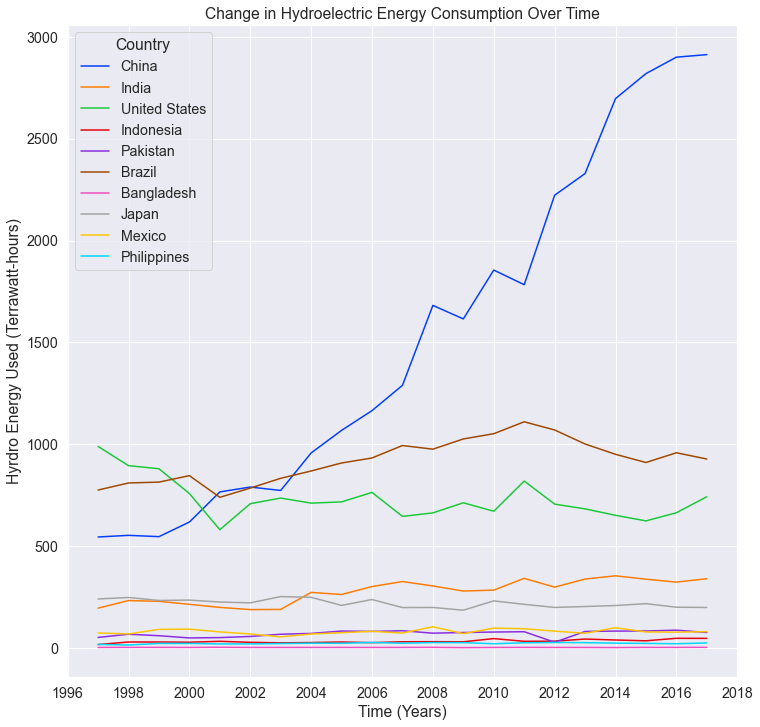

In [79]:
sns.set(rc = {'figure.figsize':(12, 12)})
sns.set(font_scale = 1.3)
hydro_vs_time = sns.lineplot(x='year', y='hydro', hue='country', data=countries_of_interest_df, palette = 'bright')

hydro_vs_time.set_xlabel('Time (Years)')
hydro_vs_time.set_ylabel('Hyrdro Energy Used (Terrawatt-hours)')

plt.legend(title='Country')
hydro_vs_time.xaxis.set_major_locator(ticker.MultipleLocator(2))
hydro_vs_time.set(title='Change in Hydroelectric Energy Consumption Over Time')

### Wind Energy Usage Over Time

China and the US have seen the similar increases in wind energy usage over the past 20 years. India and Brazil have also seen small increases in recent years with the rest of the coutnries being relatively stagnant. 

[Text(0.5, 1.0, 'Change in Wind Energy Consumption Over Time')]

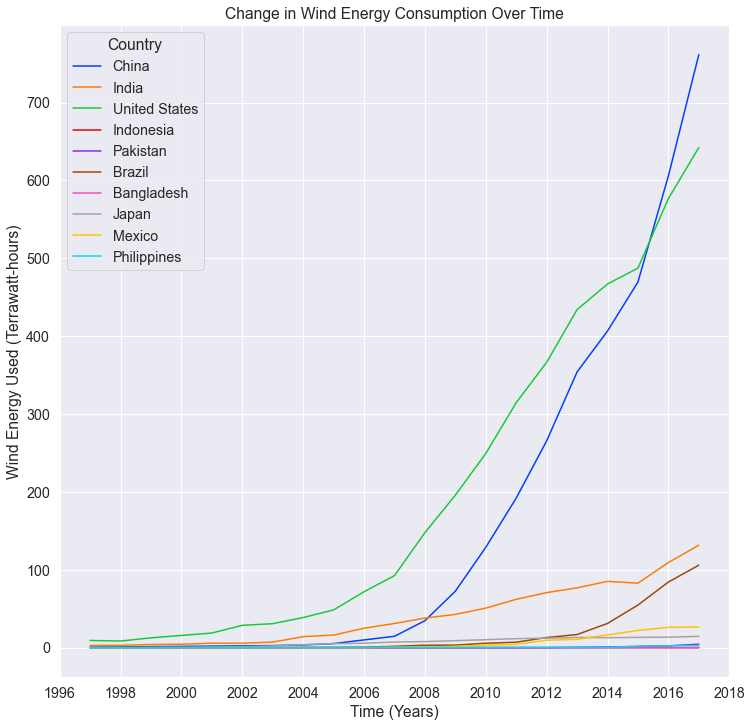

In [80]:
sns.set(rc = {'figure.figsize':(12, 12)})
sns.set(font_scale = 1.3)
wind_vs_time = sns.lineplot(x='year', y='wind', hue='country', data=countries_of_interest_df, palette = 'bright')

wind_vs_time.set_xlabel('Time (Years)')
wind_vs_time.set_ylabel('Wind Energy Used (Terrawatt-hours)')

plt.legend(title='Country')
wind_vs_time.xaxis.set_major_locator(ticker.MultipleLocator(2))
wind_vs_time.set(title='Change in Wind Energy Consumption Over Time')

### Solar Energy Usage Over Time

Compared to the other renewable energy sources, solar seems to have the most countries with relative exponential growth. China, the US, Japan, and India all seem to have significant increases in solar usage however, the remaining countries still seem to have stagnant growth. 

[Text(0.5, 1.0, 'Change in Solar Energy Consumption Over Time')]

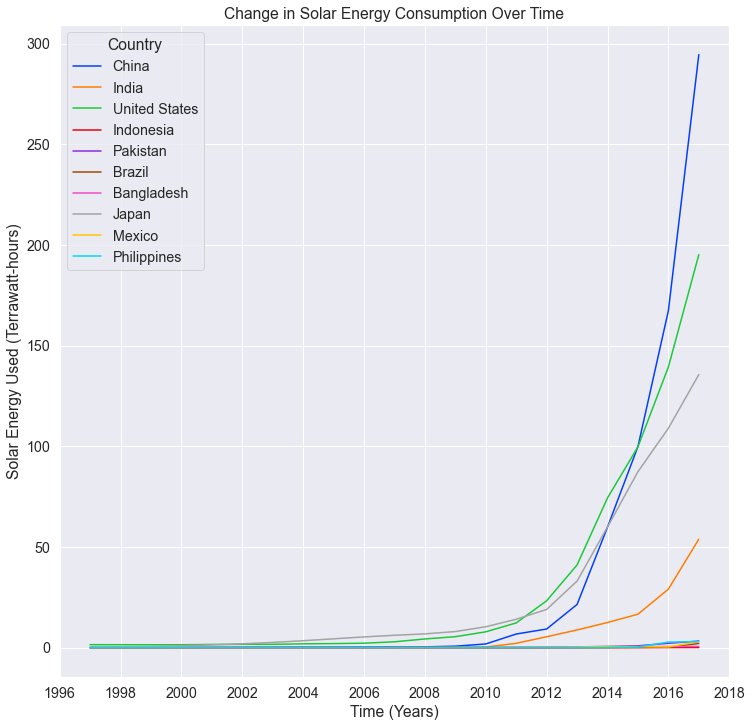

In [81]:
sns.set(rc = {'figure.figsize':(12, 12)})
sns.set(font_scale = 1.3)
solar_vs_time = sns.lineplot(x='year', y='solar', hue='country', data=countries_of_interest_df, palette = 'bright')

solar_vs_time.set_xlabel('Time (Years)')
solar_vs_time.set_ylabel('Solar Energy Used (Terrawatt-hours)')

plt.legend(title='Country')
solar_vs_time.xaxis.set_major_locator(ticker.MultipleLocator(2))
solar_vs_time.set(title='Change in Solar Energy Consumption Over Time')

### Other Renewable Energy Usage Over Time

The countries we chose do not use alternative renewable energy sources nearly as much as the ones we retrieved from our datasets. Hoever, China and Brazil seen to have a large increase in alternative renewables over the past 20 years. 

[Text(0.5, 1.0, 'Change in Other Energy Consumption Over Time')]

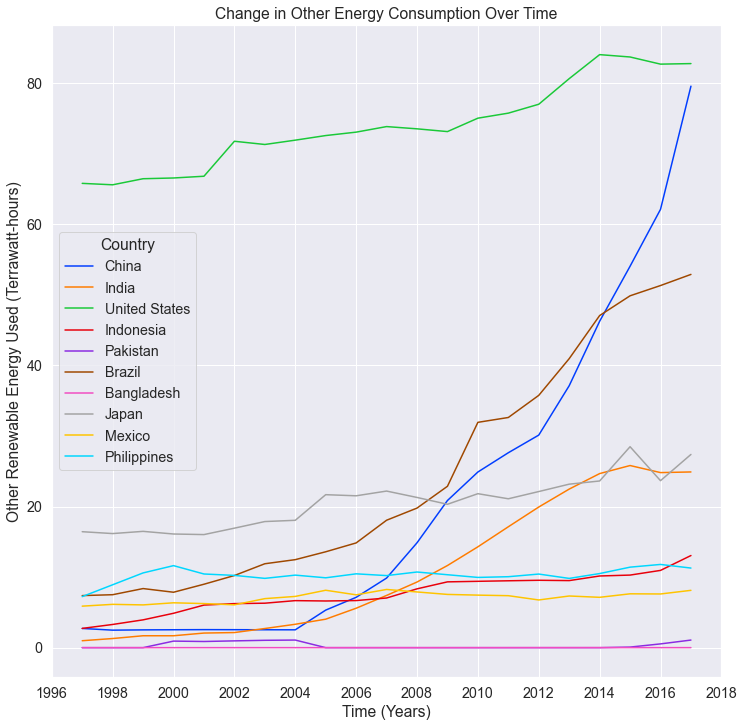

In [82]:
sns.set(rc = {'figure.figsize':(12, 12)})
sns.set(font_scale = 1.3)
other_vs_time = sns.lineplot(x='year', y='other', hue='country', data=countries_of_interest_df, palette = 'bright')

other_vs_time.set_xlabel('Time (Years)')
other_vs_time.set_ylabel('Other Renewable Energy Used (Terrawatt-hours)')

plt.legend(title='Country')
other_vs_time.xaxis.set_major_locator(ticker.MultipleLocator(2))
other_vs_time.set(title='Change in Other Energy Consumption Over Time')

### Findings

From the graphs that we have generated above, it is very clear that only a handful of the selected countries have made significant increases in their usage of renewable energy. While, these 10 countries do have the highest populations, their respective GDP per capita measures were vastly different which could explain why some countries were able to utilize renewable energy at a higher rate. In fact, we noticed that regardles of whether the energy that was used was non-renewable or renewable, GDP per capita seemed to be a huge factor in determining how much energy was used despite all these coutnries having high population numbers. From the information we have gathered we seem to beleive that there is some correlation between a countries gdp per capita and their usage of renewable energies. 

In order to further analyze whether or not a statistically significant relationship exists, we'll perform linear regression on the energy source and GDP per capita for each energy source. 

In [83]:
#create a list of energy sources to loop through
energy_list = ['coal', 'oil','gas', 'nuclear', 'hydro', 'wind', 'solar', 'other']

#loop through creates energy list
for i in energy_list:
    print('------------------------------------ %s ------------------------------------' % i.upper())
    #create a model for each energy source 
    out_val_1, pred_val_1 = patsy.dmatrices('%s ~ gdp_per_capita' % i, countries_of_interest_df)
    mod_val_1 = sm.OLS(out_val_1, pred_val_1)
    res_val_1 = mod_val_1.fit()
    print(res_val_1.summary())
    print('\n')

------------------------------------ COAL ------------------------------------
                            OLS Regression Results                            
Dep. Variable:                   coal   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     3.816
Date:                Mon, 14 Mar 2022   Prob (F-statistic):             0.0521
Time:                        23:27:38   Log-Likelihood:                -2093.0
No. Observations:                 210   AIC:                             4190.
Df Residuals:                     208   BIC:                             4197.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------

From the regression results that we created above. All of the energy sources except for coal had statistically significant results. This for the most part coicides with our predictions that we had at the beginning of the research project. This ultimately leads us to beleive that in regards to renewable sources of energy, usage of this type of energy is predicted to increase when the GDP per capita of a nation increases. Likewise we can say the same for non-renewables except for coal which wasn't supported due to it not being statistically significant. 

# Ethics & Privacy

Amidst the growing concerns of global climate change, there are a variety of perspectives on what should be done to move toward cleaner energy. While the solution to this problem is seemingly easy, in practice it is not. For many of the world’s largest economies, their people and industries rely heavily on the energy produced by coal and natural gas. While they certainly have the capital and necessary land to move their energy towards cleaner energy, their efforts in doing so have been slow and tedious and have yet to produce much of a result. Furthermore, for countries that are not as prosperous they are unsure whether they can rely on wind and solar power because they only work when the wind is blowing and the sun is shining. Even while some of the larger economies have been moving away from fossil fuels, they are still the largest producers of CO2 output per year. Furthermore, booming economies are building more coal plants which signifies their reliance on such energy[1]. This raises a question: can the UN’s climate goal of cutting emissions by 45% be met by 2030 without stunting the growth of humans worldwide[2]? 

This correlational study is not meant to shift blame from one country to another. Rather, it is meant to identify the countries who are heavily dependent on non-renewable energy sources. Further it is meant to identify countries that are less dependent on non-renewable energy sources. Hopefully by identifying which countries can support large populations with a plethora of renewable energy, solutions can be found for the countries who are both capable and liable to do so. 
    
The data collected and being used is public data, thus the privacy and confidentiality of individuals is upheld because they are left out of the data that we collected. Furthermore, in this project we are not looking at any individual data but rather the data of countries. This data includes metrics such as population, GDP, and energy consumption. Potential biases that could be in the data may come from the data collection used for our energy consumption models. The website that we got this data from collects its data from BP plc, one of the largest oil and gas companies in the world. The data that is collected from them could be tampered or misleading as a way to prevent their company from being looked down upon. While this is certainly a cause for concern, data from five other organizations (International Energy Agency, Energy Information Administration, The Shift Project, World Bank, and Eurostat) are used in their datasets as well, and hopefully this could mitigate any potential biased data collected from BP. 
 
#### Q&A: Stanford expert explains why we continue burning coal for energy | Energy - Mark Shwartz
- [1] https://energy.stanford.edu/news/qa-stanford-expert-explains-why-we-continue-burning-coal-energy

#### Campaigns - United Nations Sustainable Development - Goal 13 outlined by the UN
- [2]https://www.un.org/sustainabledevelopment/campaigns/#:~:text=The%20United%20Nations%20have%20ongoing%20campaigns%20that%20highlights,rise%20to%20well%20below%202%20degrees%20Celsius.%20

# Conclusion & Discussion

The economy of a country undoubtedly has an affect on the total amount of energy that country uses. That comes as no surprise because as industries grow, so will the energy output. Furthermore, with a higher GDP per capita, more citizens will have more money to start new businesses. Some of these businesses could be in the renewable energy sector which would increase the amount of renewable energy being used. If these sectors were to grow large enough it could potentially reduce the reliance on non-renewable energy. Overall, our findings supported this theory, so we accept our hypothesis that a larger gdp per-capita has a positive correlation with greater renewable energy output.

Without excess money to spend on the technology and infrastructure needed for renewable energy, countries with lower gdp per capita figures would rather spend their money on fossil fuels since that is what the infrastructure is designed to use. Furthermore, geography can play an important role in whether or not a country can rely on renewable energy. Solar is only a good option in places where the land is flat, and sunny. That rules out many mountainous and wet climates. Even in deserts, the sandstorms can damage the solar panels. This same logic can be applied to hydroelectric power, and to wind energy as well. All in all, for many nations fossil fuels are an easy choice for energy because they’re easier to store, they’re easier to use with their current infrastructure, and they’re readily available to them. 


# Limitations

While our research question, hypothesis, and data were relatively specific and led us to reach conclusions, there were still a number of limitations that may have altered our ability to analyze the data we managed to retrieve. 

Firstly, we narrowed our focus on countries with the largest populations in order to avoid using smaller countries where a rapid economic, political or social change can occur and cause a drastic and sudden shift in their energy usage. This shift would then be seen in the graphs and illustrate an inaccurate representation of how much energy consumption there truly is in that particular country. By using countries with a larger population, we aimed to analyze larger and more consistent numbers while finding an organized way of narrowing down our data. However, despite being the most populous 10 countries and since there is no clear correlation between population size and renewable energy usage, several countries did not display enough energy consumption to establish a significant difference in our results. We could have found a more efficient way to selectively pick our focus countries where several could have promised more versatile results despite being smaller in size.

In addition to this, the amount of confounding variables that are present in this project go much further than what was analyzed. In essence, while narrowing down a correlation between GDP per capita and renewable energy output is possible, by no means does it cover all the factors behind the scenes. Geographical factors, the country’s reliance on infrastructure, and their involvement in managing their energy sources truly makes an impact on whether or not they rely on renewable or nonrenewable energy sources. Data regarding several of these factors can be used in order to further develop our research question and hypothesis. When observing them as a whole, our project shows a huge simplification of the correlation that exists in the real world. 

Lastly, in regards to the coding process, a limitation that may have altered how we interpreted our results is our usage of line graphs. However, since our data was not relatively complex and hard to understand, there was no real need to incorporate a wide variety of diagrams that may cause confusion regarding the data that was presented. While other factors could have been explored in depth and a wider range of years could have been used, the main focus was still established and other methods of data analysis were utilized to reach our conclusions.


# Team Contributions

For all segments of the project, we worked together via Zoom meeting to make sure we all had input on the design and process. That being said, we each had an emphasized responsibility in the specific parts outlined in our Project Timeline Proposal. We took turns leading the segments that we were responsible for and used Zoom to discuss how to approach each task listed below.

- Import & Wrangle Data (Sebastian)
- EDA (Matthew)
- Finalize wrangling/EDA; Begin Analysis (Lucas; Rolando)
- Complete analysis (Nick)
- Draft results/conclusion/discussion (Everyone)
